In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from plotnine import *
from matplotlib import pyplot as plt

# Barbell Graph

The problem with the Karate graph is that it isn't *clear*. I have to spend large amounts of text pointing out what the reader should see. We want it to be obvious.

In [66]:
left = nx.connected_watts_strogatz_graph(25, 6, 0.2)
right = left = nx.connected_watts_strogatz_graph(25, 6, 0.2)

In [67]:
right = nx.relabel_nodes(right, {i: i+25 for i in right.nodes()})

In [68]:
combined = nx.compose(left, right)
combined.add_edge(np.random.choice(left.nodes()), np.random.choice(right.nodes()))
combined.add_edge(np.random.choice(left.nodes()), np.random.choice(right.nodes()))
combined.add_edge(np.random.choice(left.nodes()), np.random.choice(right.nodes()))

/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


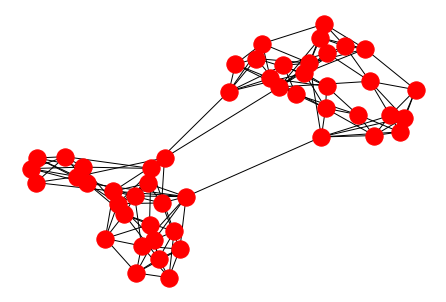

In [69]:
nx.draw(combined)

In [70]:
def write_graph(g, path):
    with open(path, 'w') as f:
        f.write('{} {}\n'.format(g.number_of_nodes(), g.number_of_edges()))
        for u, v in g.edges():
            f.write('{} {}\n'.format(u, v))

In [71]:
write_graph(combined, 'sparse_barbell.txt')

In [72]:
!../target/release/dump-weights sparse_barbell.txt sparse_barbell_weights.txt edgecut-approx 0.2 0.01 0.01

Args { graph: "sparse_barbell.txt", output: "sparse_barbell_weights.txt", method: EdgecutApprox { stop_prob: 0.2, eps: 0.01, delta: 0.01 }, log: None, threads: None, disable_dedup: false }
Dec 31 11:11:44.228 INFO loaded graph from sparse_barbell.txt, m: 153, n: 50, path: sparse_barbell.txt
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 0/153
sampling edge weights █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 20/153 ETA: 1s
sampling edge weights ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 40/153 ETA: 1s
sampling edge weights ████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 58/153 ETA: 1s
sampling edge weights ████████████████████░░░░░░░░░░░░░░░░░░░░░░░ 74/153 ETA: 1s
sampling edge weights ████████████████████████░░░░░░░░░░░░░░░░░░░ 88/153 ETA: 1s
sampling edge weights ████████████████████████████░░░░░░░░░░░░░░ 102/153 ETA: 0s
sampling edge weights ███████████████████████████████░░░░░░░░░░░ 114/153 ETA: 0s
sampling edge weights ██████████████████████████████████░░░░

In [419]:
weights = pd.read_csv('sparse_barbell_weights.txt', sep=' ', header=None, names=('source', 'target', 'weight'), dtype={'source': np.int64, 'target': np.int64, 'weight': np.float64})

In [420]:
cws_min = weights['weight'].quantile(0.1)

In [74]:
nx.set_edge_attributes(combined, {(int(r['source']), int(r['target'])): r['weight'] for _, r in weights.iterrows()}, 'weight')

In [465]:
pos = nx.layout.fruchterman_reingold_layout(combined, weight=None, random_state=51)

/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.N

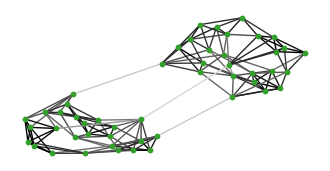

In [487]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=100)
nx.draw(combined, pos, node_color=[plt.cm.Paired.colors[3]], edge_color=list(nx.get_edge_attributes(combined, 'weight').values()), node_size=10, width=1, edge_vmin=cws_min, edge_vmax=1, edge_cmap=plt.cm.Greys_r, ax=ax)
fig.savefig('cws_pair.pdf', bbox_inches='tight')

# LFR Benchmark Graph

In [153]:
n = 100
tau1 = 3
tau2 = 1.5
mu = 0.1
lfr = nx.algorithms.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=10)

In [154]:
write_graph(lfr, 'lfr.txt')

In [155]:
!../target/release/dump-weights lfr.txt lfr_weights.txt edgecut-approx 0.2 0.01 0.01

Args { graph: "lfr.txt", output: "lfr_weights.txt", method: EdgecutApprox { stop_prob: 0.2, eps: 0.01, delta: 0.01 }, log: None, threads: None, disable_dedup: false }
Dec 31 11:33:53.690 INFO loaded graph from lfr.txt, m: 213, n: 100, path: lfr.txt
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 0/213
sampling edge weights ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 12/213 ETA: 1s
sampling edge weights ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 30/213 ETA: 1s
sampling edge weights ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 51/213 ETA: 1s
sampling edge weights █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 69/213 ETA: 1s
sampling edge weights ████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 84/213 ETA: 1s
sampling edge weights ███████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 96/213 ETA: 1s
sampling edge weights █████████████████████░░░░░░░░░░░░░░░░░░░░░ 108/213 ETA: 1s
sampling edge weights ███████████████████████░░░░░░░░░░░░░░░░░░░ 120/213 ETA: 1s
sampling edge weights 

In [462]:
weights = pd.read_csv('lfr_weights.txt', sep=' ', header=None, names=('source', 'target', 'weight'), dtype={'source': np.int64, 'target': np.int64, 'weight': np.float64})

In [417]:
lfr_min = weights['weight'].quantile(0.1)

In [157]:
nx.set_edge_attributes(lfr, {(int(r['source']), int(r['target'])): r['weight'] for _, r in weights.iterrows()}, 'weight')

In [174]:
lfr_giant = sorted(nx.connected_component_subgraphs(lfr), key=lambda g: g.number_of_nodes(), reverse=True)[0]

In [488]:
pos = nx.layout.shell_layout(lfr_giant)
pos = nx.layout.spring_layout(lfr_giant, pos=pos, weight=None)

In [489]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=100)
nx.draw(lfr_giant, pos, node_color=[plt.cm.Paired.colors[3]], edge_color=list(nx.get_edge_attributes(lfr_giant, 'weight').values()), node_size=3, width=1, edge_vmin=lfr_min, edge_vmax=1, edge_cmap=plt.cm.Greys_r, ax=ax)
fig.savefig('lfr.pdf', bbox_inches='tight')

/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/home/emallson/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.N